In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import pandas as pd
import time
from datetime import datetime
import sys
import csv
import seaborn as sns
import scipy.io

print(sys.version, "\n")

now = datetime.now()
print("last run on " + str(now))

3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)] 

last run on 2018-02-15 10:24:14.370426


In [2]:
baseDir = os.getcwd()
dataDir = '/Users/cswitzer/Dropbox/mothMachineLearning_dataAndFigs/Data/'
figDir = '/Users/cswitzer/Dropbox/mothMachineLearning_dataAndFigs/Figs/'

In [120]:
# read in data

# original Data
s1 = pd.read_csv(os.path.join(dataDir, "simulationData1_withFinalX.csv"))
s2 = pd.read_csv(os.path.join(dataDir, "simulationData2_withFinalX.csv"))
s3 = pd.read_csv(os.path.join(dataDir, "simulationData3_withFinalX.csv"))

In [121]:
# Jorge's small dataset
s11 = pd.DataFrame(scipy.io.loadmat(os.path.join(dataDir, "ValSp3_1_am_conX.mat"))['ValSp3'])
s22 = pd.DataFrame(scipy.io.loadmat(os.path.join(dataDir, "ValSp3_2_am_conX.mat"))['ValSp3'])
s33 = pd.DataFrame(scipy.io.loadmat(os.path.join(dataDir, "ValSp3_3_am_conX.mat"))['ValSp3'])

In [122]:
s11.columns = ['x_99', 'y_99', 'theta_99', 'phi_99', 'x_dot_99',
       'y_dot_99', 'theta_dot_99', 'phi_dot_99', 'tao','F', 'alpha',  'runtime']

In [123]:
s11.head()

,x_99,y_99,theta_99,phi_99,x_dot_99,y_dot_99,theta_dot_99,phi_dot_99,tao,F,alpha,runtime
0,6.202621,-11.631341,0.907438,5.418089,7.282538,62.501887,2.933329,5.245930,-63793.186175,12498.670184,1.485781,0.337176
1,7.769831,-13.300072,1.038628,4.563811,357.076500,-1096.138013,-1.233882,1.084760,-76528.453583,40043.397556,3.885149,0.100299
2,5.508284,-9.572433,1.200948,4.507487,-44.489263,-407.752039,14.712257,8.858473,50631.994084,31193.260941,2.781195,0.112350
3,-2.756172,9.058861,1.308325,5.341325,-226.407871,34.794522,5.173236,2.426684,81420.239048,3281.311340,5.546422,0.115598
4,6.152431,0.890639,0.925807,4.324700,408.294919,-496.908346,-2.863265,-0.165125,-88785.225730,24701.974168,4.929632,0.145824


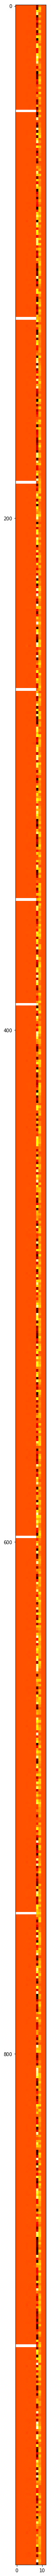

In [124]:
# show missing
plt.figure(figsize=(20,100))
plt.imshow(s11, cmap='hot', interpolation='nearest')

plt.show()

In [125]:
s1.columns  = ['x_0', 'y_0', 'theta_0', 'phi_0', 'x_dot_0', 'y_dot_0', 'theta_dot_0',
       'phi_dot_0', 'x_99_pred', 'y_99_pred', 'theta_99_pred', 'phi_99_pred', 'x_dot_99_pred',
       'y_dot_99_pred', 'theta_dot_99_pred', 'phi_dot_99_pred', 'F', 'alpha', 'tao', 'Fx',
       'Fy', 'F_', 'alpha_', 'tao_pred', 'Fx_pred', 'Fy_pred', 'F_pred',
       'alpha_pred']
s1.head()

,x_0,y_0,theta_0,phi_0,x_dot_0,y_dot_0,theta_dot_0,phi_dot_0,x_99_pred,y_99_pred,...,tao,Fx,Fy,F_,alpha_,tao_pred,Fx_pred,Fy_pred,F_pred,alpha_pred
0,4.400063,-11.425972,0.761058,5.239797,171.701675,-91.368073,18.392160,18.365949,6.164918,-11.613386,...,-61565.373739,996.104052,12677.001182,12716.075741,1.492382,-63793.186175,1061.297225,12453.529803,12498.670184,1.485781
1,2.185919,1.359633,1.047558,4.549883,198.496327,-368.587997,-1.570617,1.220019,7.689498,-13.248871,...,-74441.053507,-29455.265907,-26572.631150,39670.107335,3.875586,-76528.453583,-29474.589500,-27105.760672,40043.397556,3.885149
2,2.580331,-5.724311,1.118963,4.447157,345.964162,16.931746,-0.849197,1.298328,5.468831,-9.555568,...,49688.658341,-29196.825199,11236.966925,31284.565322,2.774197,50631.994084,-29189.302814,11000.187696,31193.260941,2.781195
3,2.300297,8.474293,1.218912,5.279960,-282.178321,25.384868,0.512417,3.815208,-2.758413,9.058949,...,78973.324049,2427.365213,-2196.134833,3273.394276,5.547757,81420.239048,2430.294704,-2204.693121,3281.311340,5.546422
4,2.066322,8.852613,0.939100,4.311036,-1.787126,-299.145154,-0.511141,2.625030,6.107748,0.878515,...,-94927.626344,5131.505747,-23965.752116,24508.970311,4.923322,-88785.225730,5324.227804,-24121.362442,24701.974168,4.929632


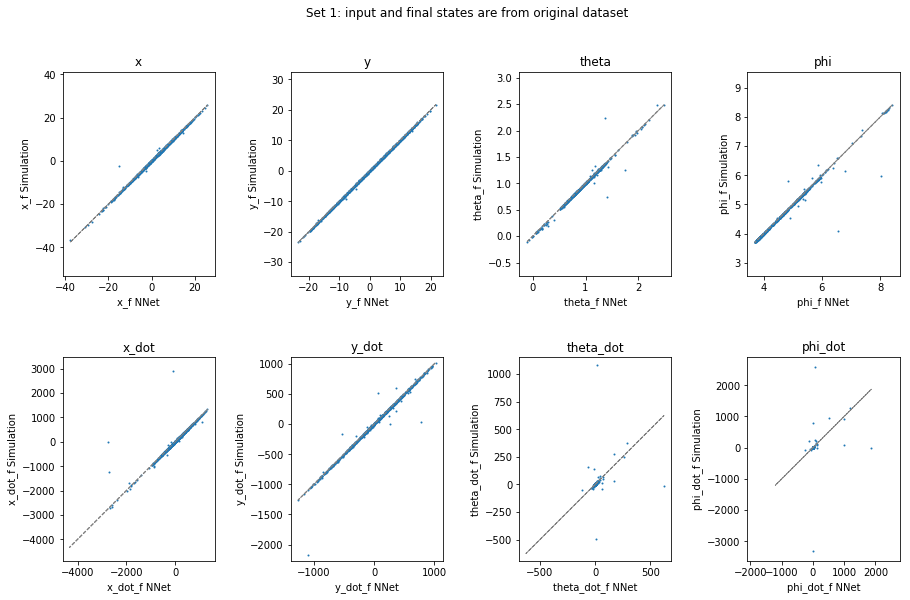

In [127]:
plt.close("all")
fig, axs = plt.subplots(2,4, figsize=(15, 9), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=0.5)

axs = axs.ravel()
fig.suptitle("Set 1: input and final states are from original dataset")


for ii in np.arange(0,8):
    axs[ii].plot(s1.iloc[:,ii + 8], s1.iloc[:,ii + 8], c= 'grey', linewidth = 1, linestyle = "--")
    axs[ii].set_aspect('equal', 'datalim')
    axs[ii].scatter(x = s1.iloc[:,ii + 8], y = s11.iloc[:, ii],s = 1)
    
    if ii >= 4:
        jj = 2
    else:
        jj= 1
    axs[ii].set_title(str("_".join(s1.columns[ii + 8].split("_")[0:jj])))
    axs[ii].set_xlabel(str("_".join(s1.columns[ii + 8].split("_")[0:jj])) + "_f NNet")
    axs[ii].set_ylabel(str("_".join(s1.columns[ii + 8].split("_")[0:jj])) + "_f Simulation")
    
    


    
fig.savefig(os.path.join(figDir, "Sim1.pdf"), bbox_inches='tight')

In [128]:
s2.head()

,x_0,y_0,theta_0,phi_0,x_dot_0,y_dot_0,theta_dot_0,phi_dot_0,x_99,y_99,...,phi_99,x_dot_99,y_dot_99,theta_dot_99,phi_dot_99,tao_pred,Fx_pred,Fy_pred,F_pred,alpha_pred
0,2.564074,0.069481,0.619956,3.766846,248.368851,-262.915394,-2.173087,1.908757,7.531839,4.167624,...,4.747995,259.801613,-121.088849,-3.419041,9.485594,48340.715985,27839.869691,17392.770532,32826.312787,0.558415
1,0.595440,2.498511,0.955304,4.514937,60.202435,-156.050887,-4.549050,1.220019,-1.207857,-15.300361,...,5.142922,-271.999149,-319.838970,-0.942916,2.538827,-180551.216894,-55020.988906,-7704.295988,55557.766305,3.280713
2,2.076129,8.982695,1.018912,5.482240,-281.967130,372.254862,10.972562,-28.369335,6.196430,-2.949448,...,5.823566,570.274530,605.410495,-1.120226,3.326612,-702811.716481,-10472.034231,-24639.640718,26772.661348,4.310512
3,3.746065,9.924642,0.828441,5.562899,-230.212812,249.732142,-0.402814,0.771695,5.185149,-11.075587,...,4.075537,43.854628,551.732217,0.065616,6.252751,582.103011,-21655.802439,9537.116150,23662.847752,2.726755
4,2.458278,-2.666057,1.274882,4.687908,128.636450,100.570510,-17.175591,4.905653,4.672513,-16.483294,...,5.176470,233.634884,-554.450069,-1.678582,-2.641110,-180232.402848,-49730.736473,-29201.927943,57670.605561,3.672548


In [129]:
s22.columns = ['x_99', 'y_99', 'theta_99', 'phi_99', 'x_dot_99',
       'y_dot_99', 'theta_dot_99', 'phi_dot_99', 'tao','F', 'alpha',  'runtime']
s22.head()

,x_99,y_99,theta_99,phi_99,x_dot_99,y_dot_99,theta_dot_99,phi_dot_99,tao,F,alpha,runtime
0,9.769731,0.099726,0.673879,3.809285,464.845445,270.752560,3.000534,1.715049,48340.715985,32826.312787,0.558415,0.086166
1,-2.746633,-9.837641,0.956741,4.578176,-397.655732,-1074.364810,-0.936613,5.021878,-180551.216894,55557.766305,3.280713,0.084379
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-702811.716481,26772.661348,4.310512,0.117629
3,-4.725507,12.893579,0.901394,5.633329,-611.721237,39.826666,12.984256,10.396341,582.103011,23662.847752,2.726755,0.080374
4,7.839037,-11.095926,1.274328,4.747046,393.588734,-938.509572,-2.128779,3.551228,-180232.402848,57670.605561,3.672548,0.084306


316 1500


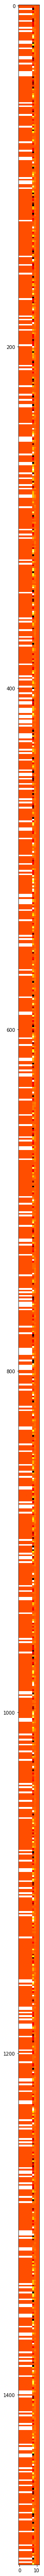

In [130]:
plt.figure(figsize=(20,100))
plt.imshow(s22, cmap='hot', interpolation='nearest')

# print num of rows with NA
# show how many NA's were dropped
print(s22.shape[0] - s22.dropna().shape[0], s22.shape[0])

plt.show()


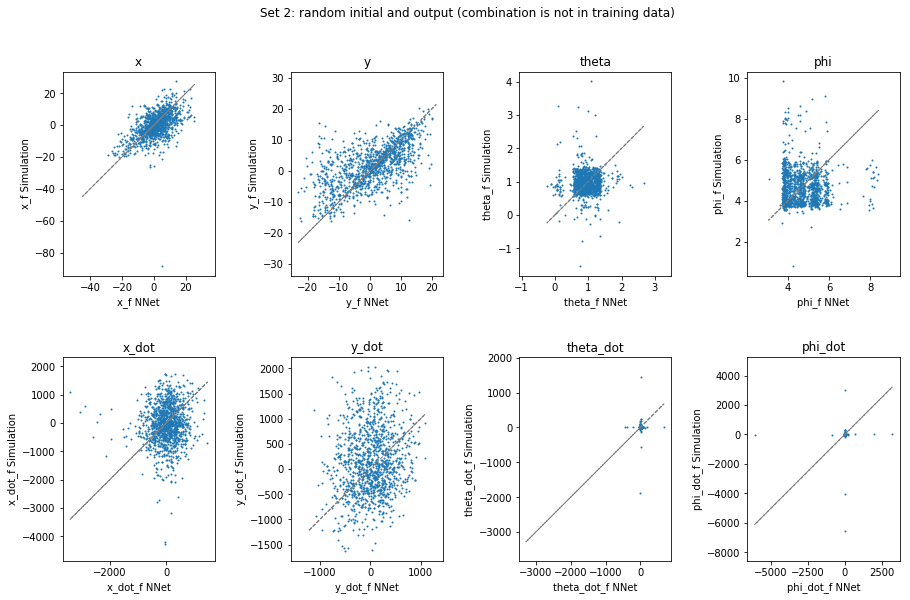

In [131]:
plt.close("all")
fig, axs = plt.subplots(2,4, figsize=(15, 9), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=0.5)

axs = axs.ravel()
fig.suptitle("Set 2: random initial and output (combination is not in training data)")


for ii in np.arange(0,8):
    axs[ii].plot(s2.iloc[:,ii + 8], s2.iloc[:,ii + 8], c= 'grey', linewidth = 1, linestyle = "--")
    axs[ii].set_aspect('equal', 'datalim')
    axs[ii].scatter(x = s2.iloc[:,ii + 8], y = s22.iloc[:, ii],s = 1)
    
    if ii >= 4:
        jj = 2
    else:
        jj= 1
    axs[ii].set_title(str("_".join(s2.columns[ii + 8].split("_")[0:jj])))
    axs[ii].set_xlabel(str("_".join(s2.columns[ii + 8].split("_")[0:jj])) + "_f NNet")
    axs[ii].set_ylabel(str("_".join(s2.columns[ii + 8].split("_")[0:jj])) + "_f Simulation")
    
    


    
fig.savefig(os.path.join(figDir, "Sim2.pdf"), bbox_inches='tight')

In [132]:
s33.columns = ['x_99', 'y_99', 'theta_99', 'phi_99', 'x_dot_99',
       'y_dot_99', 'theta_dot_99', 'phi_dot_99', 'tao','F', 'alpha',  'runtime']
s33.head()

,x_99,y_99,theta_99,phi_99,x_dot_99,y_dot_99,theta_dot_99,phi_dot_99,tao,F,alpha,runtime
0,-6.354407,-6.630990,0.766463,4.634370,76.379333,722.858053,0.544257,-7.287788,231378.902153,66669.222870,0.336159,0.077016
1,3.791470,10.987681,1.218053,5.273085,428.131195,227.050743,-4.605611,-4.703576,11140.017740,41036.467065,5.350261,0.084758
2,-5.959728,-7.959743,0.715646,3.869917,-542.194801,450.752374,6.124583,6.948351,-16658.419487,53408.387424,1.574247,0.081153
3,0.957504,8.397136,0.834542,4.221637,-261.915966,-237.062690,-2.976755,7.468068,-316197.625554,35889.864577,2.886753,0.081918
4,3.624963,5.022360,0.732247,3.788151,107.735151,-480.328065,-5.094349,0.712550,-193651.436637,43150.973782,3.770820,0.087667


In [133]:
s3.head()

,x_0,y_0,theta_0,phi_0,x_dot_0,y_dot_0,theta_dot_0,phi_dot_0,x_99,y_99,...,phi_99,x_dot_99,y_dot_99,theta_dot_99,phi_dot_99,tao_pred,Fx_pred,Fy_pred,F_pred,alpha_pred
0,-2.495935,-10.466181,0.838372,4.796263,-449.460406,-345.496726,-8.543574,-12.022193,2.515431,-9.621814,...,3.897618,-317.528609,319.218622,3.985042,-0.550417,231378.902153,62937.645115,21991.773586,66669.222870,0.336159
1,2.300297,8.474293,1.218912,5.279960,-282.178321,25.384868,0.512417,3.815208,9.363828,9.868987,...,3.824574,-114.565149,250.150451,0.366718,-0.124313,11140.017740,24436.699194,-32967.246802,41036.467065,5.350261
2,-1.274241,-9.746963,0.682222,3.826483,70.926413,-277.184202,-0.596519,-3.463615,-8.198881,-9.222124,...,3.922485,87.477019,463.647856,-2.637576,3.538764,-16658.419487,-184.318599,53408.069370,53408.387424,1.574247
3,0.775356,9.296978,0.868827,4.148078,277.338235,150.933080,-1.178743,1.019703,3.511545,3.319837,...,3.853053,-442.767948,55.308822,-0.134295,1.646087,-316197.625554,-34730.755244,9047.486916,35889.864577,2.886753
4,0.066745,6.744998,0.795294,3.790989,239.937302,309.348620,0.404731,1.594923,7.802484,-0.297023,...,3.858605,602.865300,168.876783,-1.895543,0.618453,-193651.436637,-34886.810423,-25395.216023,43150.973782,3.770820


185 1200


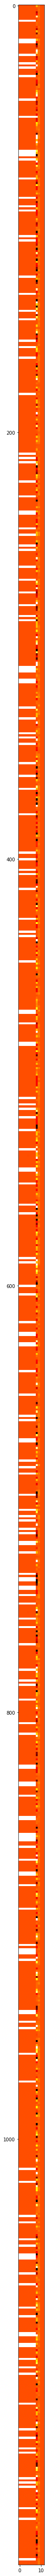

In [134]:
plt.figure(figsize=(20,100))
plt.imshow(s33, cmap='hot', interpolation='nearest')

# print num of rows with NA
# show how many NA's were dropped
print(s33.shape[0] - s33.dropna().shape[0], s33.shape[0])

plt.show()

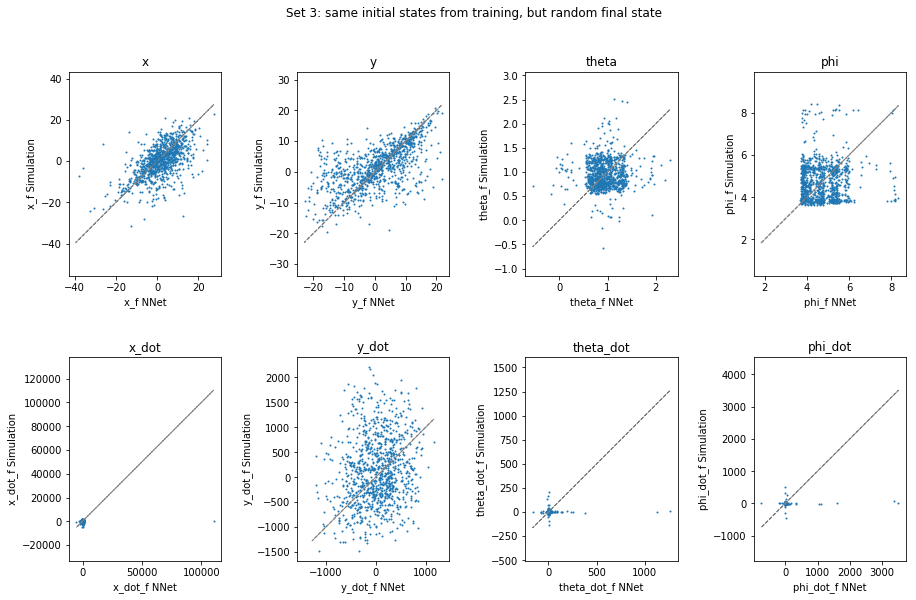

In [135]:
plt.close("all")
fig, axs = plt.subplots(2,4, figsize=(15, 9), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=0.5)

axs = axs.ravel()
fig.suptitle("Set 3: same initial states from training, but random final state")


for ii in np.arange(0,8):
    axs[ii].plot(s3.iloc[:,ii + 8], s3.iloc[:,ii + 8], c= 'grey', linewidth = 1, linestyle = "--")
    axs[ii].set_aspect('equal', 'datalim')
    axs[ii].scatter(x = s3.iloc[:,ii + 8], y = s33.iloc[:, ii],s = 1)
    
    if ii >= 4:
        jj = 2
    else:
        jj= 1
    axs[ii].set_title(str("_".join(s3.columns[ii + 8].split("_")[0:jj])))
    axs[ii].set_xlabel(str("_".join(s3.columns[ii + 8].split("_")[0:jj])) + "_f NNet")
    axs[ii].set_ylabel(str("_".join(s3.columns[ii + 8].split("_")[0:jj])) + "_f Simulation")
    
    


    
fig.savefig(os.path.join(figDir, "Sim3.pdf"), bbox_inches='tight')

In [ ]:
## refref: plot spray
